### Notes to Self about using Jyptyer Notebooks:
Escape brings you to command mode when you can use shortcuts quickly
Toggle between markdown (esc + m) code (esc + y)
(esc + h) brings you to a menu of shortcuts

Shortcuts for command mode (continued):
(esc + b) insert cell below
(esc + a) insert cell above

Shortcuts for coding mode:
(shift + tab) = tool tips
(tab) autocomplete 

### Notebook Aims
The aim will be to make a script that allows me to plot distance vs time for the cGAS condensation data. I will do this using bluelake commands, and research on published scripts in harbor 

## Select a file to work with: 

In [18]:
import glob
from lumicks import pylake as lk
import matplotlib.pyplot as plt
import pandas as pd

dir_root = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\Data_Analysis\Projects\cGAS\2020-10-16 500nM and 4uM cat domain'+'/'
files = glob.glob(dir_root + '*Marker*.h5')
for file in files:
    print(file[len(dir_root):])
file_to_open = dir_root + input("Which file would you like:~copy and paste the file name~")

# Select a an FD curve to plot: 


20201016-165457 Marker 4 DNA 7.h5
20201016-175424 Marker 3 DNA 1 500pM protein.h5
20201016-180129 Marker 7 DNA 3 500nM cat domain.h5
20201016-181031 Marker 10 DNA 5 force clamp 1 settings 4uM protein WEIRD STUFF.h5
20201016-181331 Marker 2 DNA 6.h5
20201016-182135 Marker 12 DNA 8.h5
20201016-182705 Marker 13 DNA 9.h5
Which file would you like:~copy and paste the file name~20201016-181331 Marker 2 DNA 6.h5


###  Optional: run this next cell to visualize all the fd curves in the marker file

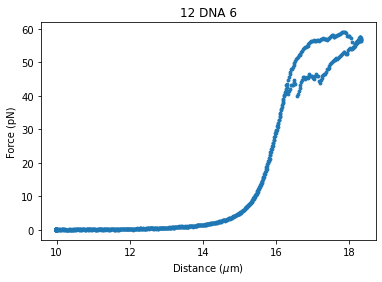

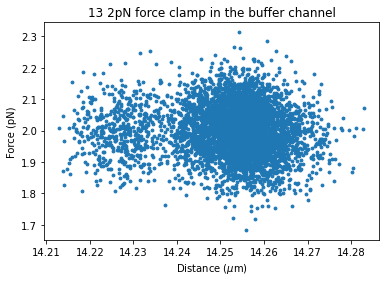

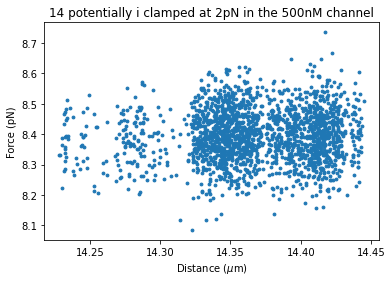

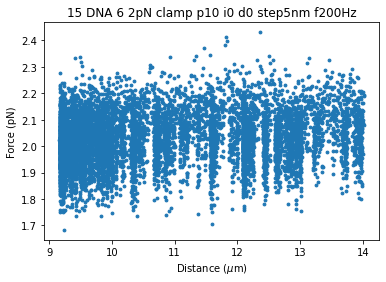

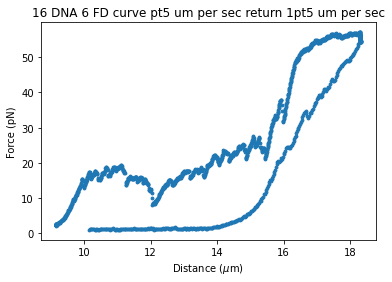

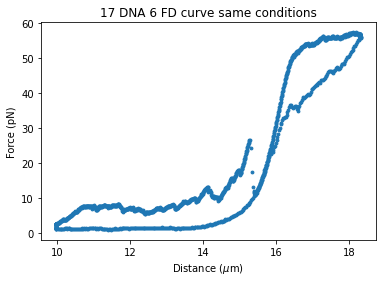

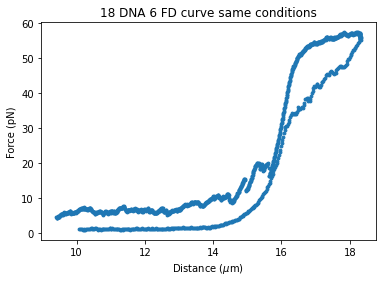

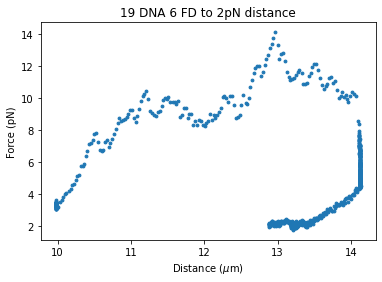

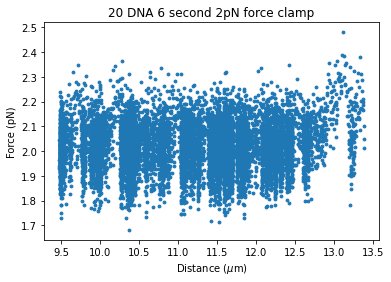

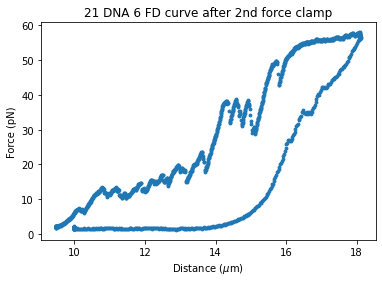

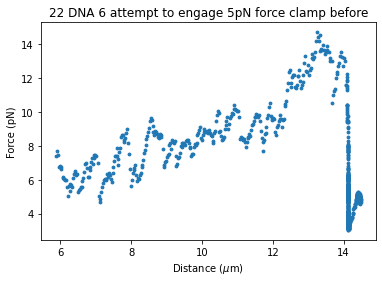

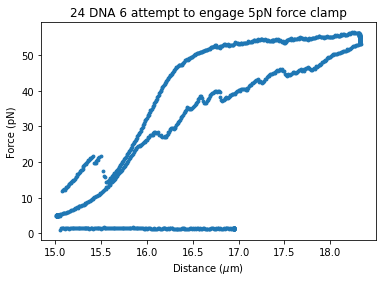

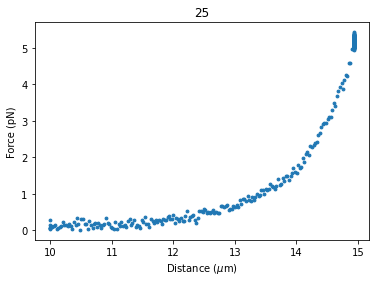

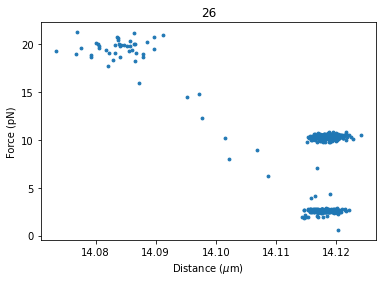

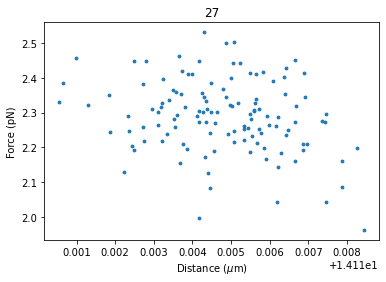

In [19]:
#  Optional: run this to visualize all the fd curves in the marker file
file = lk.File(file_to_open)
fdcurves = file.fdcurves
for name, fd in file.fdcurves.items():
    fig = plt.figure()
    fd.plot_scatter()
#     plt.savefig(name)

### Now that you've vidualized some FD curves within the Marker structure, you can pick which ones you want to plot

12 DNA 6
13 2pN force clamp in the buffer channel
14 potentially i clamped at 2pN in the 500nM channel
15 DNA 6 2pN clamp p10 i0 d0 step5nm f200Hz
16 DNA 6 FD curve pt5 um per sec return 1pt5 um per sec
17 DNA 6 FD curve same conditions
18 DNA 6 FD curve same conditions
19 DNA 6 FD to 2pN distance
20 DNA 6 second 2pN force clamp
21 DNA 6 FD curve after 2nd force clamp
22 DNA 6 attempt to engage 5pN force clamp before
24 DNA 6 attempt to engage 5pN force clamp
25
26
27
Which fdcurve to work with:~copy and paste the key name~15 DNA 6 2pN clamp p10 i0 d0 step5nm f200Hz


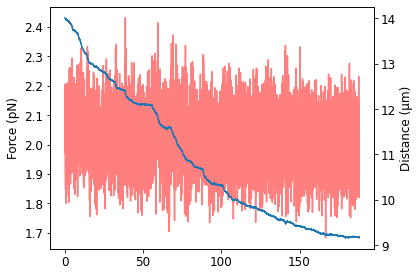

In [20]:
"""Plot force and distance data"""
plt.rcParams['font.size'] = 12
# print(file_to_open)

def open_this(file):
    """Which FDCurve to open."""
    file = lk.File(file)
    fdcurves = list(file.fdcurves)
    for fdcurve in fdcurves:
        print(fdcurve)
    fdcurve_to_open = input("Which fdcurve to work with:~copy and paste the key name~")
    return(fdcurve_to_open)
    
def make_df(file, fdcurve_to_open, bp_scale=0.3):
    """Turn Lumicks file from file name to pandas DataFrame."""
    file = lk.File(file)
#     fdcurves = list(file.fdcurves)
#     for fdcurve in fdcurves:
#         print(fdcurve)
#     fdcurve_to_open = input("Which fdcurve to work with:~copy and paste the key name~")
    f = file.fdcurves[fdcurve_to_open]
    t0 = f.distance1.timestamps[0]
    time = (f.distance1.timestamps - t0)/1e9
    df = pd.DataFrame()
    df['Time (s)'] = time
    df['Distance (µm)'] = f.distance1.data
    df['Distance (nm)'] = df['Distance (µm)']*1000
    df['Force (pN)'] = f.downsampled_force2.data # Claudia's Change to force 2 data
    df['Distance (bp)'] = df['Distance (nm)']/bp_scale
    return(df)

def plot_df(df, fname, force_low, force_high):
    """Plot DataFrame Force and Distance data in ROI for force.

    Saves figure as PNG"""
    subdf = df.loc[(df['Force (pN)'] > force_low) & (df['Force (pN)'] < force_high)]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(subdf['Time (s)'], subdf['Force (pN)'], color='red', alpha=0.5)
    plt.ylabel('Force (pN)')
    ax2 = ax1.twinx()
    ax2.plot(subdf['Time (s)'], subdf['Distance (µm)'])
    plt.ylabel('Distance (µm)')
    plt.xlabel('Time (s)')
    plt.tight_layout()
#     plt.savefig(fname + '.png', dpi=300)
#     plt.close(fig)




'''files = []
with open('file_list.txt', 'r') as f:
    for line in f:
        line = dir_root + line.strip()
        files.append(line.strip())'''

# for file in files:
fdcurve_to_open = open_this(file_to_open)
df = make_df(file_to_open, fdcurve_to_open)
fig_name = fdcurve_to_open + file_to_open.split('/')[-1][:-3] + '.png'
plot_df(df, fig_name, 1.5, 3.5)
# plot_df(df, fig_name, 1.5, 3.5)



Everything that comes below are just cells that I was using to test out snippets of script

In [ ]:
print(fdcurve_to_open)

In [ ]:
import glob
dir_root = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\Data_Analysis\Projects\cGAS\2020-10-11 4uM cat domain'+'/'
files = glob.glob(dir_root + '*FD Curve*.h5')
for file in files:
    print(file[117:])
file_to_open = dir_root + input("Which file would you like:~copy and paste the file name~")
fig_name = file_to_open.split('/')[-1][:-3] + '.png'
print(fig_name)



In [ ]:
import glob
import matplotlib.pyplot as plt
'''This section will allow you to select which Marker h5 file you would like to open'''
dir_root = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\Data_Analysis\Projects\cGAS\2020-10-16 500nM and 4uM cat domain'+'/'
files = glob.glob(dir_root + '*Marker*.h5')
for file in files:
    print(file[len(dir_root):])
file_to_open = dir_root + input("Which file would you like:~copy and paste the file name~")
# fig_name = file_to_open.split('/')[-1][:-3] + '.png'
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
# Learn to manipulate lumicks files 
import lumicks.pylake as lk
import matplotlib.pyplot as plt

file = lk.File(file_to_open)
# for fdcurve in list(file.fdcurves):
#     print(fdcurve)
print('\n')
fdcurves = file.fdcurves
# list_details_f = []
# list_details_d = []

for name, fd in file.fdcurves.items():
    fig = plt.figure()
    fd.plot_scatter()
#     list_details_f.append(fd.f)
#     list_details_d.append(fd.d)
    plt.savefig(name)
curve1 = fdcurves["12 DNA 6"]
# force = curve1.downsampled_force1x
# distance = curve1.distance1
# plt.plot(distance,force)
# curve1.plot_scatter()

